# EXAMEN FINAL - Probabilidad y Estadística para la Inteligencia Artificial

## Integrantes:
- Emiliano Uriel Martino
- Carolina Perez Omodeo
- Diego José Araujo Arellano

# Consigna

Don Francisco es un pequeño comerciante de barrio con más de 40 años de experiencia en su negocio. Gracias a su esfuerzo,
don Francisco cuenta hoy con dos supermercados de barrio, con los que sostiene su familia: El supermercado ’Santa Ana’ y el
supermercado ’La Floresta’.
Uno de sus hijos, Matías, quien recién inicia a cursar la Especialización en Inteligencia Artificial del LSE de la UBA, le
propone hacer un análisis de las ventas durante el año anterior, con el fin de hacer pronósticos para el año siguiente, lo que a
don Francisco le parece buena idea y le plantea algunas inquietudes:
1. Don Francisco necesita saber en qué mes se puede tomar unas vacaciones. También necesita saber en qué mes las ventas
serán mejoras para embarcarse en una inversión importante. Por ello le pregunta a Matías, ¿cómo se comportan las
ventas en cada mes?
2. De forma similar a la anterior, don Francisco necesita reacomodar los horarios de atención de sus supermercados a lo
largo de la semana; también debe decidir en qué días debe contratar más empleados y en qué días podría contratar
menos. Por ello pregunta, ¿cómo se comportan las ventas en cada día de la semana?
3. .Don Francisco está un poco preocupado porque tiene la impresión de que la tienda ’La Floresta’ vende menos que la
tienda ’Santa Ana’.

Don Francisco le entrega a Matías el cuaderno donde tiene registrado el valor total de sus ventas en cada día del año. Con
esta información, Matías construye sendas tablas por cada tienda en unas hojas de cálculo, en las cuales la primera columna
corresponde a la fecha y la segunda corresponde al monto de las ventas, en dólares para evitarse dolores de cabeza con la
inflación. Matías no se siente muy seguro de la tarea a realizar, así que les pide ayuda a ustedes para abordar el problema.

1. (3.5 puntos) Determinen funciones empíricas de distribución para las ventas en ambas tiendas durante cada uno de
los meses del año. Determinen también aproximaciones a las funciones de densidad para las distribuciones anteriores.
Determine intervalos de confianza empíricos para cada mes, para significancias del 95% y el 99 %.
2. (3.5 puntos) Determine funciones empíricas de distribución para las ventas en ambas tiendas por cada día de la semana.
Establezcan aproximaciones a las funciones de densidad para las distribuciones anteriores. Establezcan también intervalos
de confianza empíricos para cada día de la semana, para significancias del 95% y el 99 %.
3. (3 puntos) Realicen pruebas de hipótesis, con base en los datos, para aceptar o rechazar la intuición de Don Francisco,
con significancias de 95% y 99 %.

Deben realizar un informe en un documento pdf, en donde queden claros los siguientes aspectos:

1. Planteamiento de los problemas de investigación
2. Procesamiento realizado a los datos
3. Resultados encontrados
4. Análisis y conclusiones

# Resolución



In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
import tabulate
from scipy import stats

#### Procesamiento de los datos


In [179]:
 # ---------------- Carga de datos ----------------

datos = pd.read_excel('Grupo_8.xlsx', sheet_name=None)

# ---------------- Series dataset ----------------

santa_ana = datos['Santa Ana']
la_floresta = datos['La Floresta']

# ---------------- Formato fecha ----------------

santa_ana['Fecha'] = pd.to_datetime(santa_ana['Fecha'])
la_floresta['Fecha'] = pd.to_datetime(la_floresta['Fecha'])

# ---------------- Categoria: MES ----------------

santa_ana['Mes'] = santa_ana['Fecha'].dt.month
la_floresta['Mes'] = la_floresta['Fecha'].dt.month

santa_ana['NombreMes'] = santa_ana['Fecha'].dt.month_name()
la_floresta['NombreMes'] = la_floresta['Fecha'].dt.month_name()

# ---------------- Categoria: DIA ----------------

santa_ana['DiaSemana'] = santa_ana['Fecha'].dt.day_of_week
la_floresta['DiaSemana'] = la_floresta['Fecha'].dt.day_of_week

santa_ana['NombreDiaSemana'] = santa_ana['Fecha'].dt.day_name()
la_floresta['NombreDiaSemana'] = la_floresta['Fecha'].dt.day_name()

# ---------------- Ventas totales ----------------

ventas_mensuales_santa_ana = santa_ana.groupby('Mes')['Ventas'].sum()
ventas_mensuales_la_floresta = la_floresta.groupby('Mes')['Ventas'].sum()

ventas_diarias_santa_ana = santa_ana.groupby('DiaSemana')['Ventas'].sum()
ventas_diarias_la_floresta = la_floresta.groupby('DiaSemana')['Ventas'].sum()

# ---------------- Información auxiliar ----------------

mes_orden = ["","Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio","Agosto","Setiembre","Octubre","Noviembre","Diciembre"]
dias_orden = ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"]

santa_ana.head()


,Fecha,Ventas,Mes,NombreMes,DiaSemana,NombreDiaSemana
0,2023-01-01,12831.604642,1,January,6,Sunday
1,2023-01-02,17083.736169,1,January,0,Monday
2,2023-01-03,18958.121758,1,January,1,Tuesday
3,2023-01-04,19369.824856,1,January,2,Wednesday
4,2023-01-05,18049.720308,1,January,3,Thursday


#### **Parte 1 - Ventas Mensuales**



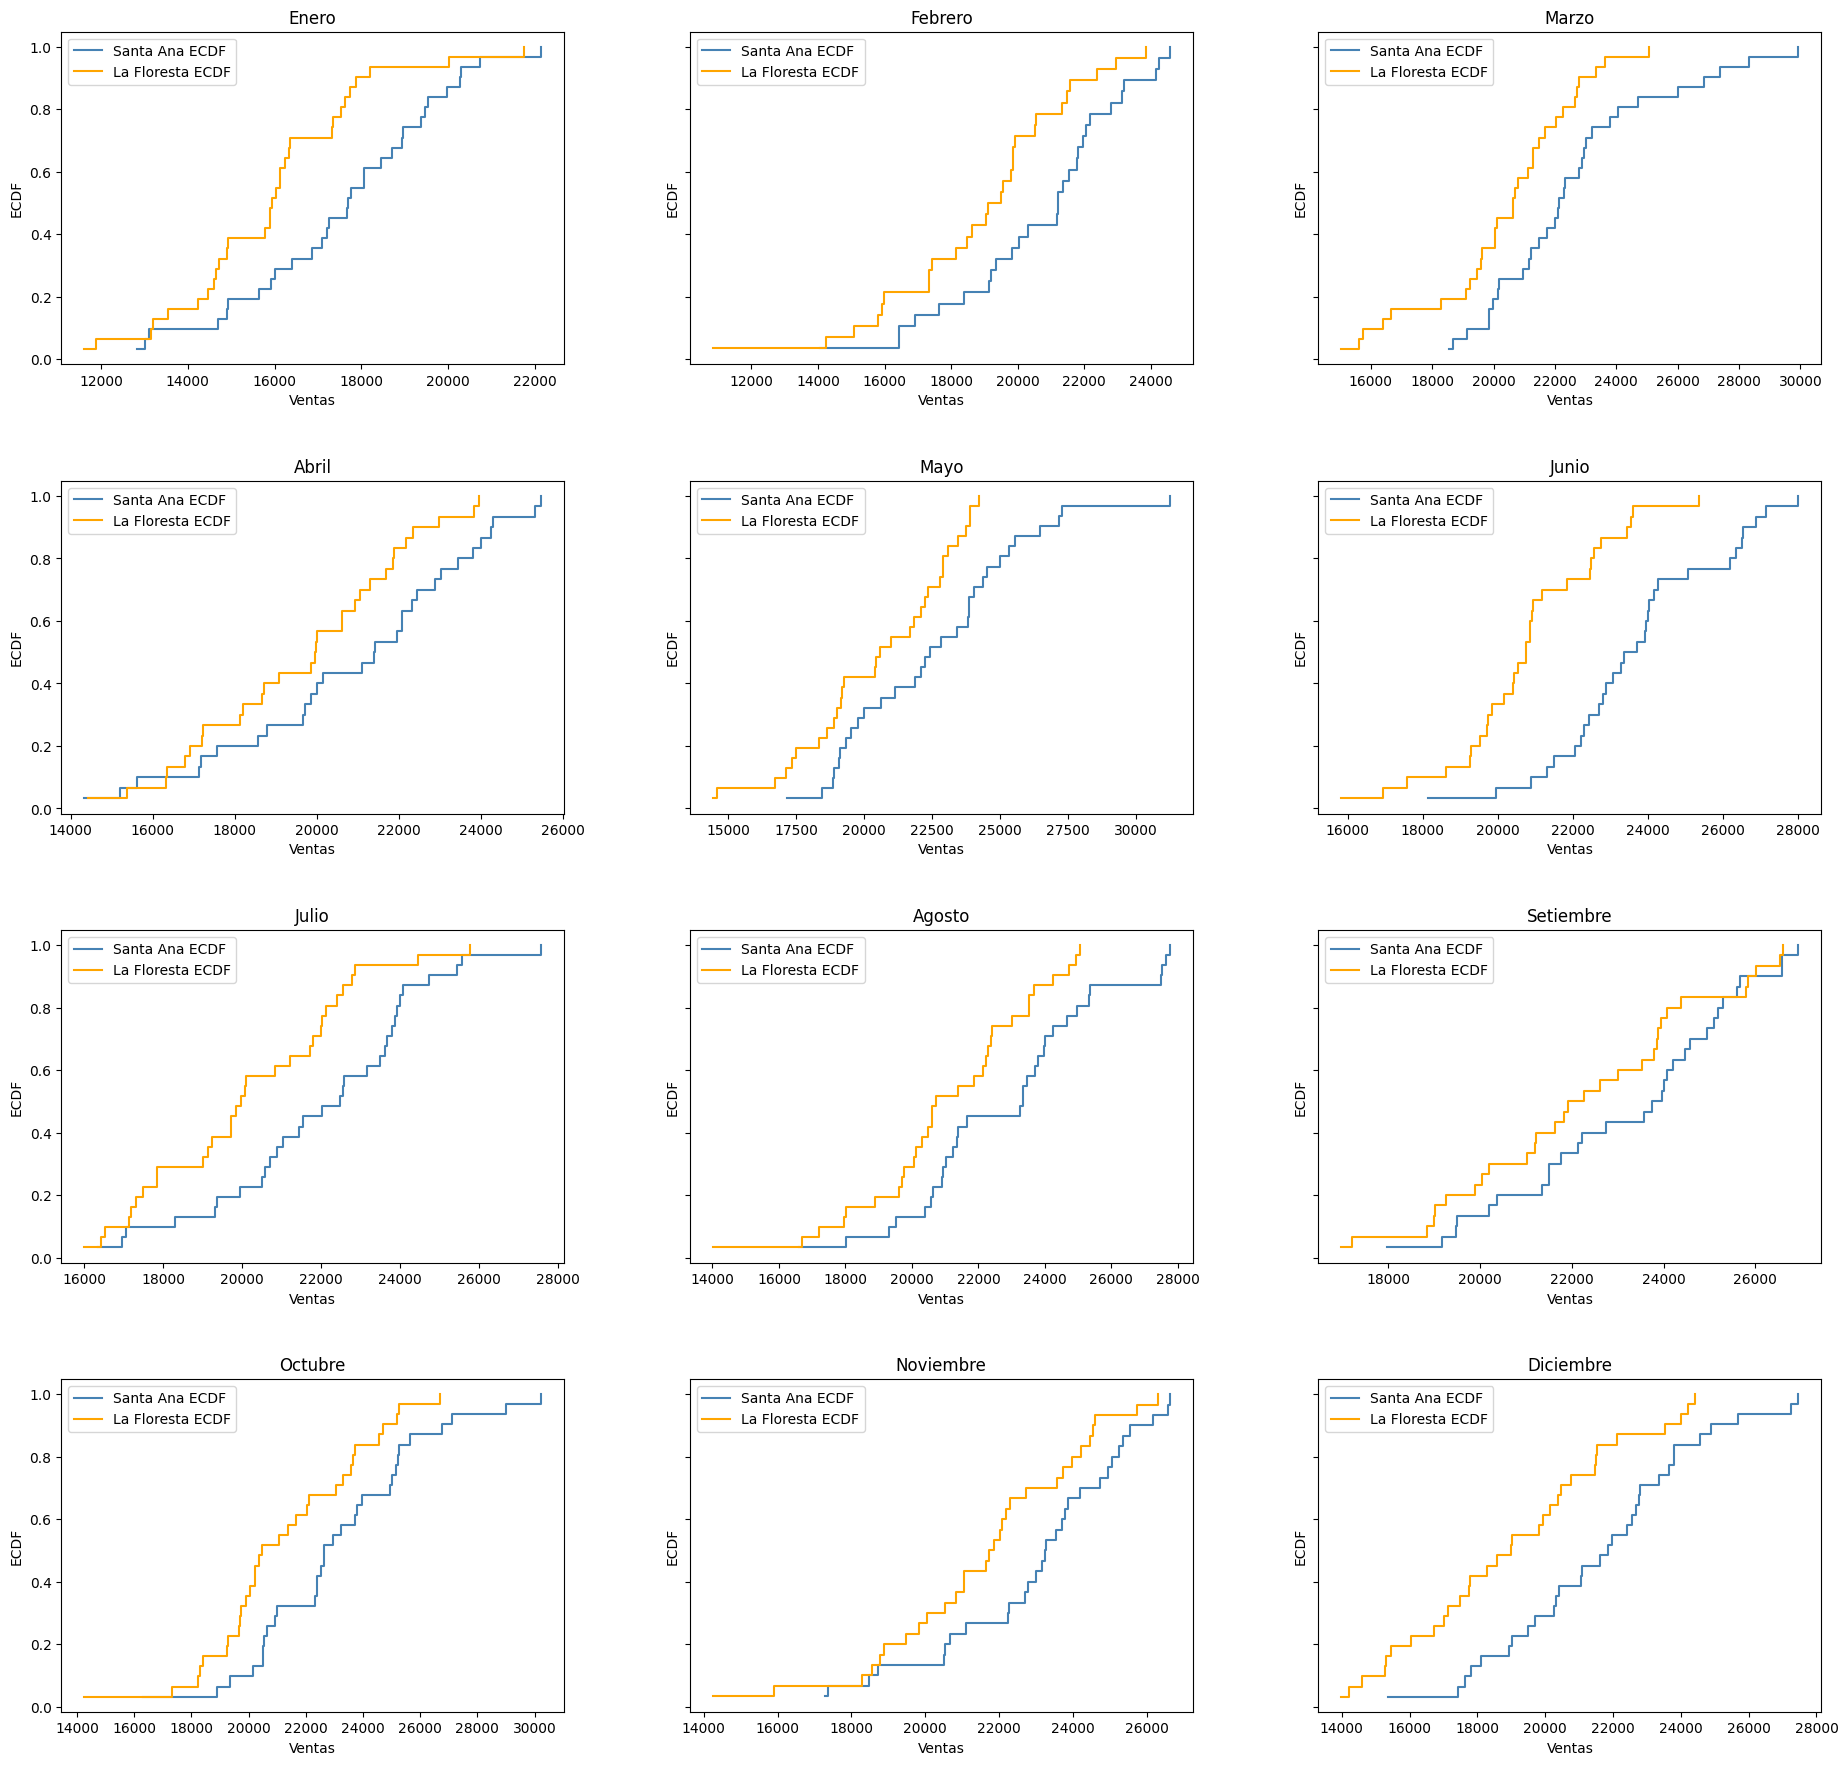

In [180]:
#  Función de distribución empírica 

def ecdf(data):
    
    sorted_data = np.sort(data)
    yvals = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    return sorted_data, yvals

def plot_monthly_distributions(data1, tienda1, data2, tienda2):
    fig, axes = plt.subplots(4, 3, figsize=(20, 20), sharey=True)
    axes = axes.flatten()  # Aplanar el array de ejes para un fácil acceso

    for month in np.unique(data1['Mes']): 
        ax = axes[month-1]
        
        monthly_data1 = data1[data1['Mes'] == month]['Ventas']
        monthly_data2 = data2[data2['Mes'] == month]['Ventas']
        
        sorted_data1, ecdf1 = ecdf(monthly_data1)
        ax.plot(sorted_data1, ecdf1, label=f'{tienda1} ECDF', color="steelblue", drawstyle='steps-post')
        
        sorted_data2, ecdf2 = ecdf(monthly_data2)
        ax.plot(sorted_data2, ecdf2, label=f'{tienda2} ECDF', color="orange", drawstyle='steps-post')

        ax.set_title(f'{mes_orden[month]}')
        ax.set_xlabel('Ventas')
        ax.set_ylabel('ECDF')
        ax.legend(loc='upper left')  

    plt.tight_layout(pad=2.0)
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.07, right=0.95, hspace=0.35, wspace=0.25)
    plt.show()

# Graficar para Santa Ana y La Floresta
plot_monthly_distributions(santa_ana, 'Santa Ana', la_floresta, 'La Floresta')

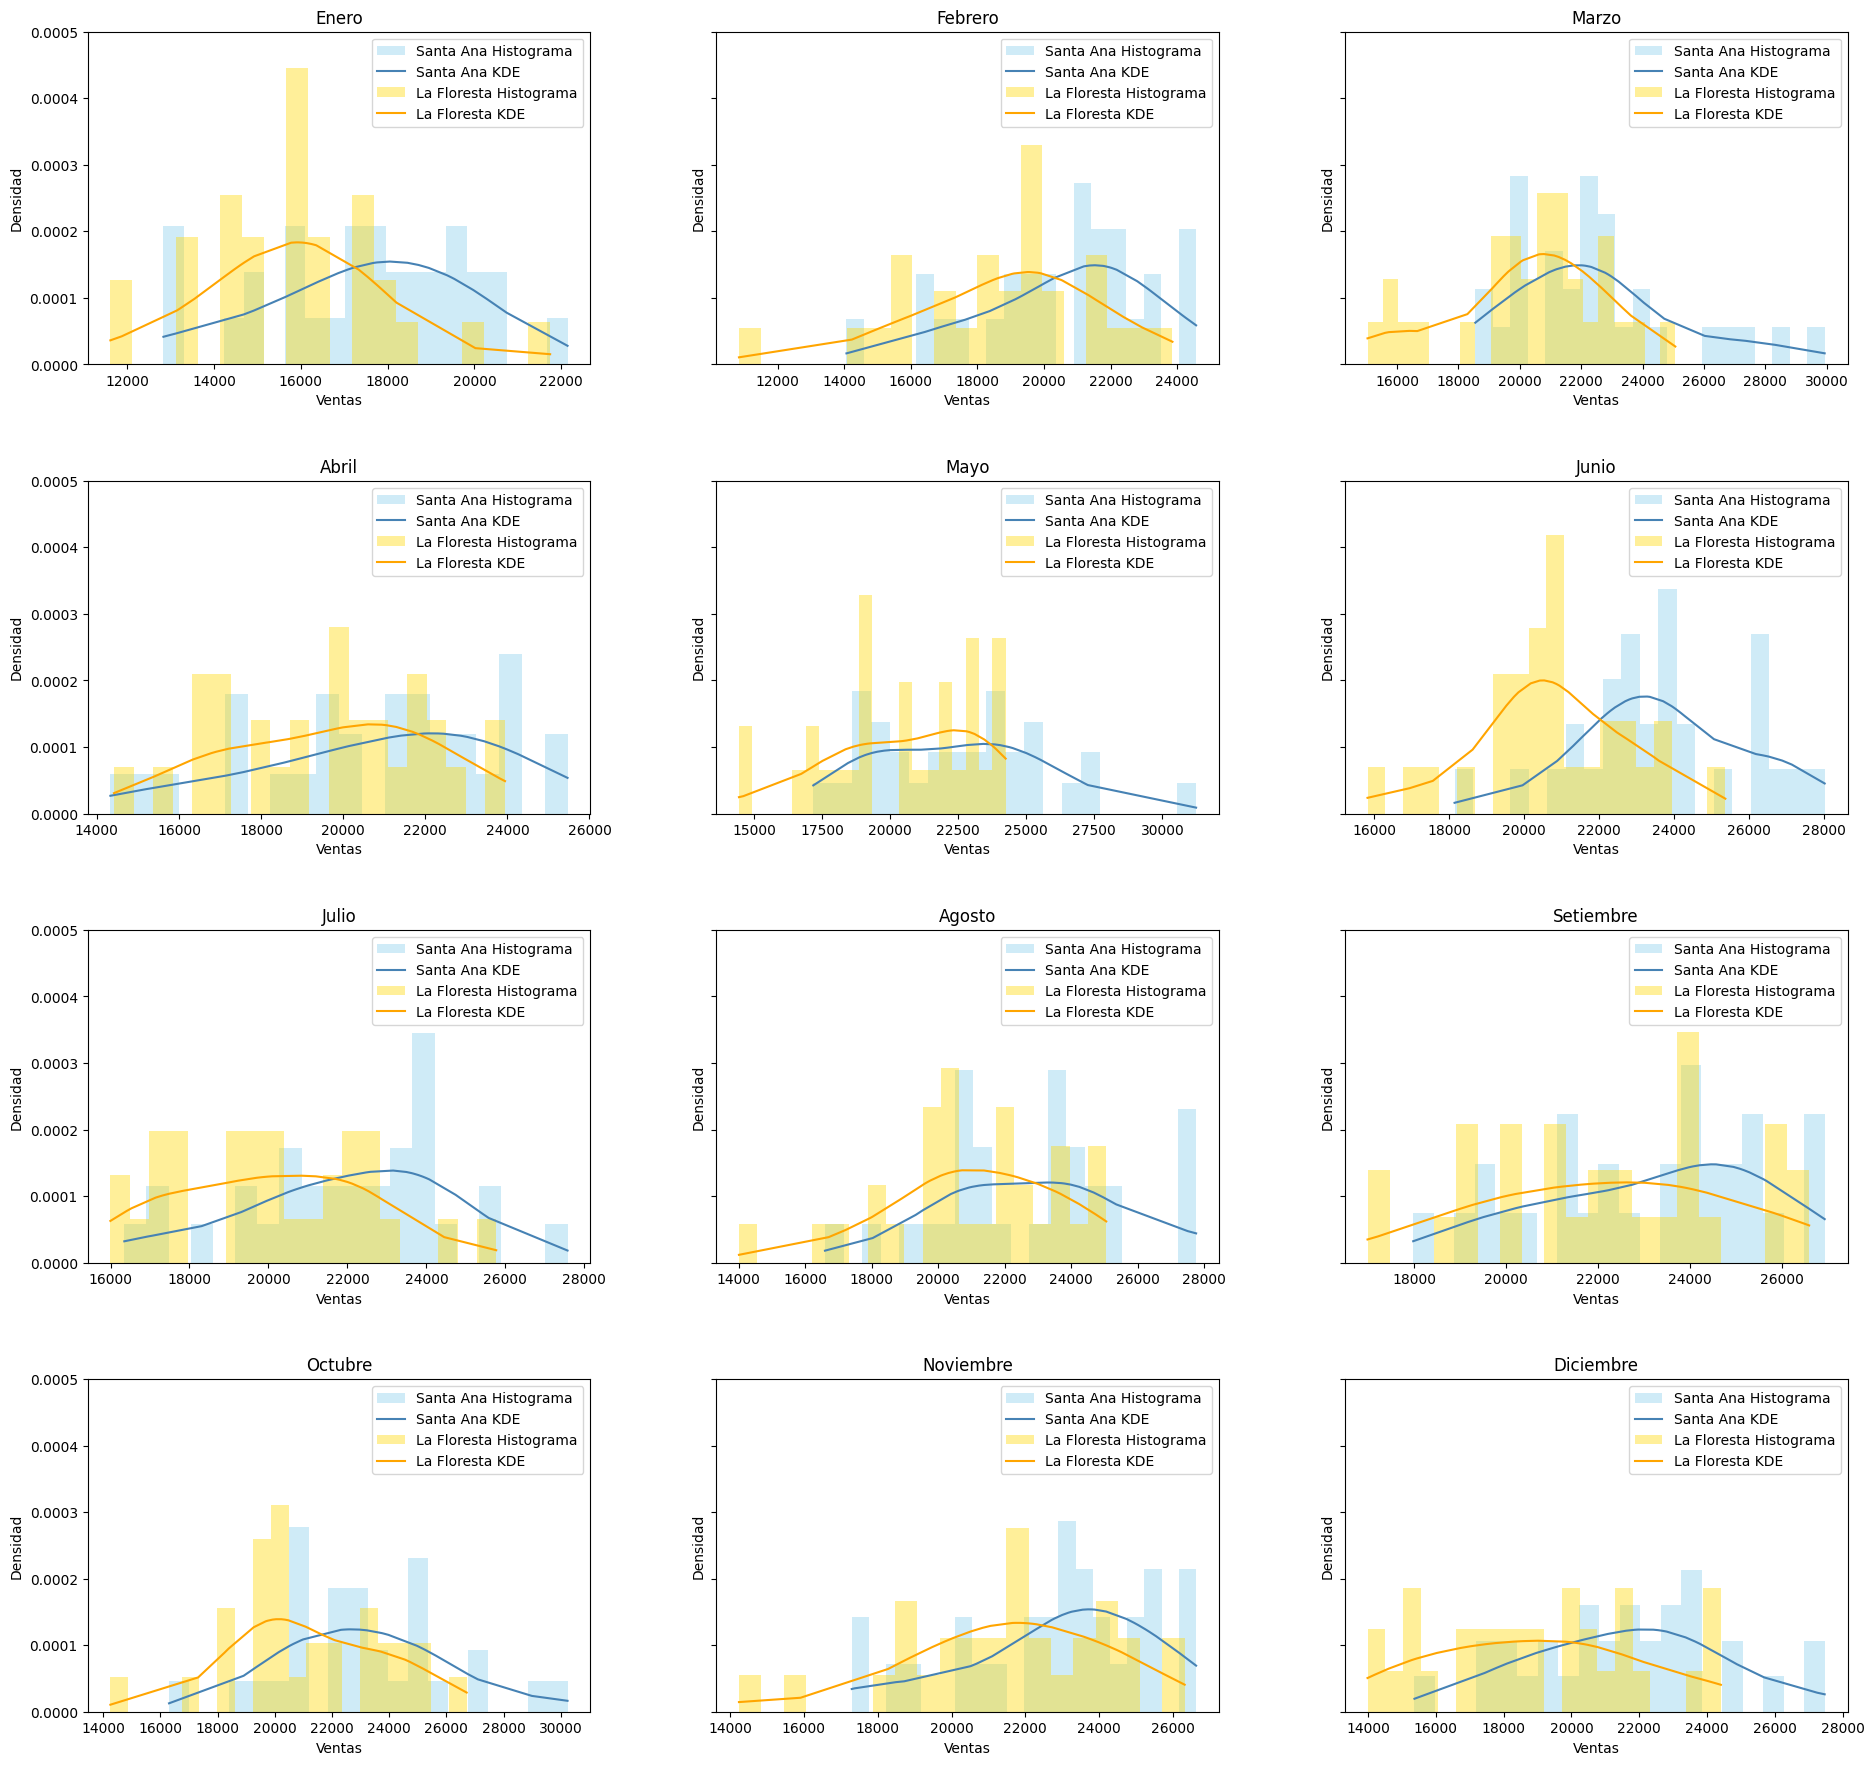

In [182]:
# ---------------- Aproximaciones a funciones de densidad : Histogramas | KDE ----------------

def plot_monthly_distributions(data1, tienda1, data2, tienda2):
    fig, axes = plt.subplots(4, 3, figsize=(20, 20), sharey=True)
    axes = axes.flatten() 

    for month in np.unique(data1['Mes']): 
        ax = axes[month-1]
        
        monthly_data1 = data1[data1['Mes'] == month]['Ventas']
        monthly_data2 = data2[data2['Mes'] == month]['Ventas']
        
        if len(monthly_data1) > 0:
            data_sorted1 = np.sort(monthly_data1)
            kde1 = gaussian_kde(monthly_data1)
            density1 = kde1(data_sorted1)
            ax.hist(monthly_data1, bins=20, density=True, alpha=0.4, label=f'{tienda1} Histograma', color="skyblue")
            ax.plot(data_sorted1, density1, label=f'{tienda1} KDE', color="steelblue")

        if len(monthly_data2) > 0:
            data_sorted2 = np.sort(monthly_data2)
            kde2 = gaussian_kde(monthly_data2)
            density2 = kde2(data_sorted2)
            ax.hist(monthly_data2, bins=20, density=True, alpha=0.4, label=f'{tienda2} Histograma', color="gold")
            ax.plot(data_sorted2, density2, label=f'{tienda2} KDE', color="orange")

        ax.set_ylim([0, 0.0005]) 
        ax.set_title(f'{mes_orden[month]}')
        ax.set_xlabel('Ventas')
        ax.set_ylabel('Densidad')
        ax.legend(loc='upper right')  

    plt.tight_layout(pad=2.0)
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.07, right=0.95, hspace=0.35, wspace=0.25)
    plt.show()

# Graficar para Santa Ana y La Floresta
plot_monthly_distributions(santa_ana, 'Santa Ana', la_floresta, 'La Floresta')

In [183]:
# Función paca calcular intervalos de confianza empíricos

def confidence_intervals(data):
    results = {}
    for month in data['Mes']:
        monthly_sales = data[data['Mes'] == month]['Ventas']
        
        # Confidence intervals
        ci_95 = np.round(np.percentile(monthly_sales, [2.5, 97.5]),2)
        ci_99 = np.round(np.percentile(monthly_sales, [0.5, 99.5]),2)
        
        results[month] = {
            'ci_95': ci_95,
            'ci_99': ci_99
        }
    return results


In [184]:

# Intervalos de confianza para SANTA ANA

results_santa_ana = confidence_intervals(santa_ana)

# Diccionario para guardar los intervalos de cada tienda por mes
intervals_santa_ana = {'Month': [], 'CI_95_Lower': [], 'CI_95_Upper': [], 'CI_99_Lower': [], 'CI_99_Upper': []}

for month in np.unique(santa_ana['Mes']):

    ci_95_santa_ana = results_santa_ana[month]['ci_95']
    ci_99_santa_ana = results_santa_ana[month]['ci_99']
    
    intervals_santa_ana['Month'].append(month)
    intervals_santa_ana['CI_95_Lower'].append(ci_95_santa_ana[0])
    intervals_santa_ana['CI_95_Upper'].append(ci_95_santa_ana[1])
    intervals_santa_ana['CI_99_Lower'].append(ci_99_santa_ana[0])
    intervals_santa_ana['CI_99_Upper'].append(ci_99_santa_ana[1])

# Dataframes | Ajustes
df_intervals_santa_ana = pd.DataFrame(intervals_santa_ana); 
df_intervals_santa_ana.columns = ['Mes','CI 95% Inferior','CI 95% Superior','CI 99% Inferior','CI 99% Superior']
df_intervals_santa_ana['Mes'] = mes_orden[1:13]

#print(df_intervals_santa_ana.to_markdown(tablefmt="grid"))
df_intervals_santa_ana


,Mes,CI 95% Inferior,CI 95% Superior,CI 99% Inferior,CI 99% Superior
0,Enero,12966.96,21094.47,12858.68,21936.69
1,Febrero,15658.48,24351.12,14383.86,24525.22
2,Marzo,18643.34,28726.12,18567.95,29693.17
3,Abril,14962.79,25352.21,14456.66,25442.60
4,Mayo,18127.39,28255.67,17361.76,30641.78
5,Junio,19461.68,27388.69,18409.28,27896.23
6,Julio,16798.73,26075.44,16439.19,27273.67
7,Agosto,17671.70,27669.70,16810.46,27741.43
8,Setiembre,18836.97,26682.64,18144.83,26887.15
9,Octubre,18257.00,29300.59,16692.47,30048.04


Mes       |   CI 95% Inferior |   CI 95% Superior |   CI 99% Inferior |   CI 99% Superior |
:---: | :---: | :---: | :---: | :---:
Enero     |           12967   |           21094.5 |           12858.7 |           21936.7 |
Febrero   |           15658.5 |           24351.1 |           14383.9 |           24525.2 |
Marzo     |           18643.3 |           28726.1 |           18568   |           29693.2 |
Abril     |           14962.8 |           25352.2 |           14456.7 |           25442.6 |
Mayo      |           18127.4 |           28255.7 |           17361.8 |           30641.8 |
Junio     |           19461.7 |           27388.7 |           18409.3 |           27896.2 |
Julio     |           16798.7 |           26075.4 |           16439.2 |           27273.7 |
Agosto    |           17671.7 |           27669.7 |           16810.5 |           27741.4 |
Setiembre |           18837   |           26682.6 |           18144.8 |           26887.2 |
Octubre   |           18257   |           29300.6 |           16692.5 |           30048   |
Noviembre |           17355.6 |           26589.9 |           17308.9 |           26617.4 |
Diciembre |           16923.6 |           27304.2 |           15681.1 |           27435.4 |


In [185]:
# Intervalos de confianza para LA FLORESTA

results_la_floresta = confidence_intervals(la_floresta)

# Diccionario para guardar los intervalos de cada tienda por mes
intervals_la_floresta = {'Month': [], 'CI_95_Lower': [], 'CI_95_Upper': [], 'CI_99_Lower': [], 'CI_99_Upper': []}

for month in np.unique(la_floresta['Mes']):

    ci_95_la_floresta = results_la_floresta[month]['ci_95']
    ci_99_la_floresta= results_la_floresta[month]['ci_99']
    
    intervals_la_floresta['Month'].append(month)
    intervals_la_floresta['CI_95_Lower'].append(ci_95_la_floresta[0])
    intervals_la_floresta['CI_95_Upper'].append(ci_95_la_floresta[1])
    intervals_la_floresta['CI_99_Lower'].append(ci_99_la_floresta[0])
    intervals_la_floresta['CI_99_Upper'].append(ci_99_la_floresta[1])

# Dataframes | Ajustes
df_intervals_la_floresta = pd.DataFrame(intervals_la_floresta); 
df_intervals_la_floresta.columns = ['Mes','CI 95% Inferior','CI 95% Superior','CI 99% Inferior','CI 99% Superior']
df_intervals_la_floresta['Mes'] = mes_orden[1:13]


#print(df_intervals_la_floresta.to_markdown(tablefmt="grid"))
df_intervals_la_floresta


,Mes,CI 95% Inferior,CI 95% Superior,CI 99% Inferior,CI 99% Superior
0,Enero,11805.81,20453.84,11648.09,21487.80
1,Febrero,13125.05,23239.60,11293.67,23734.39
2,Marzo,15464.23,23983.81,15121.79,24850.93
3,Abril,15119.73,23852.48,14557.57,23924.76
4,Mayo,14559.43,23976.40,14462.93,24187.31
5,Junio,16637.22,24087.44,15986.10,25115.15
6,Julio,16308.21,24780.30,16059.07,25570.15
7,Agosto,16030.52,24970.55,14411.80,25039.06
8,Setiembre,17139.86,26546.79,17009.20,26589.23
9,Octubre,16551.36,25611.66,14710.49,26488.12


Mes | CI 95% Inferior | CI 95% Superior | CI 99% Inferior | CI 99% Superior |
:---: | :---: | :---: | :---: | :---:
Enero     |           11805.8 |           20453.8 |           11648.1 |           21487.8 |
Febrero   |           13125   |           23239.6 |           11293.7 |           23734.4 |
Marzo     |           15464.2 |           23983.8 |           15121.8 |           24850.9 |
Abril     |           15119.7 |           23852.5 |           14557.6 |           23924.8 |
Mayo      |           14559.4 |           23976.4 |           14462.9 |           24187.3 |
Junio     |           16637.2 |           24087.4 |           15986.1 |           25115.2 |
Julio     |           16308.2 |           24780.3 |           16059.1 |           25570.2 |
Agosto    |           16030.5 |           24970.5 |           14411.8 |           25039.1 |
Setiembre |           17139.9 |           26546.8 |           17009.2 |           26589.2 |
Octubre   |           16551.4 |           25611.7 |           14710.5 |           26488.1 |
Noviembre |           15450.9 |           25892.1 |           14484   |           26229.9 |
Diciembre |           14154.5 |           24265.3 |           14019.6 |           24379.1 |


#### **Parte 2 - Ventas Dias de la Semana**

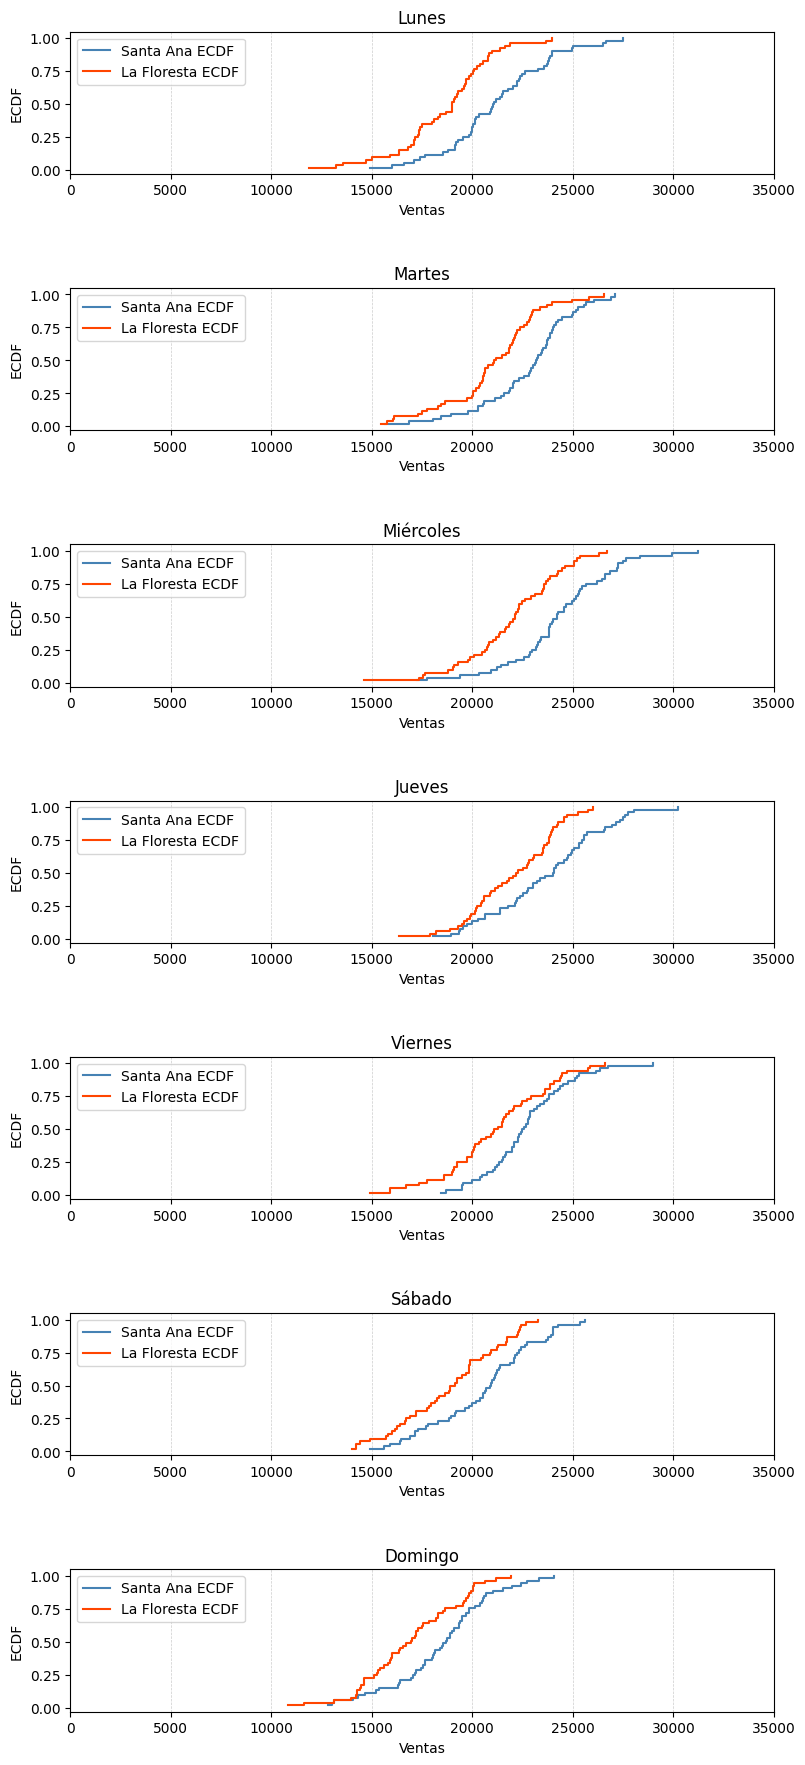

In [186]:
#  Función de distribución empírica 

def ecdf(data):
    
    sorted_data = np.sort(data)
    yvals = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    return sorted_data, yvals

def plot_day_distributions(data1, tienda1, data2, tienda2):
    fig, axes = plt.subplots(7, 1, figsize=(8, 20), sharey=True)
    axes = axes.flatten() 

    for day in range(0, 7): 
        ax = axes[day]
        
        day_data1 = data1[data1['DiaSemana'] == day]['Ventas']
        day_data2 = data2[data2['DiaSemana'] == day]['Ventas']
        
        sorted_data1, ecdf1 = ecdf(day_data1)
        ax.plot(sorted_data1, ecdf1, label=f'{tienda1} ECDF', color="steelblue", drawstyle='steps-post')
        
        sorted_data2, ecdf2 = ecdf(day_data2)
        ax.plot(sorted_data2, ecdf2, label=f'{tienda2} ECDF', color="orangered", drawstyle='steps-post')

        for x in range(0, 35000, 5000):
            ax.axvline(x=x, color='gray', alpha = 0.4, linestyle='--', linewidth=0.5)

        ax.set_xlim([0, 35000]) 
        ax.set_title(f'{dias_orden[day]}')
        ax.set_xlabel('Ventas')
        ax.set_ylabel('ECDF')
        ax.legend(loc='upper left')  



    plt.tight_layout(pad=2.0)
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.07, right=0.95, hspace=0.8, wspace=0.25)
    plt.show()

# Graficar para Santa Ana y La Floresta
plot_day_distributions(santa_ana, 'Santa Ana', la_floresta, 'La Floresta')

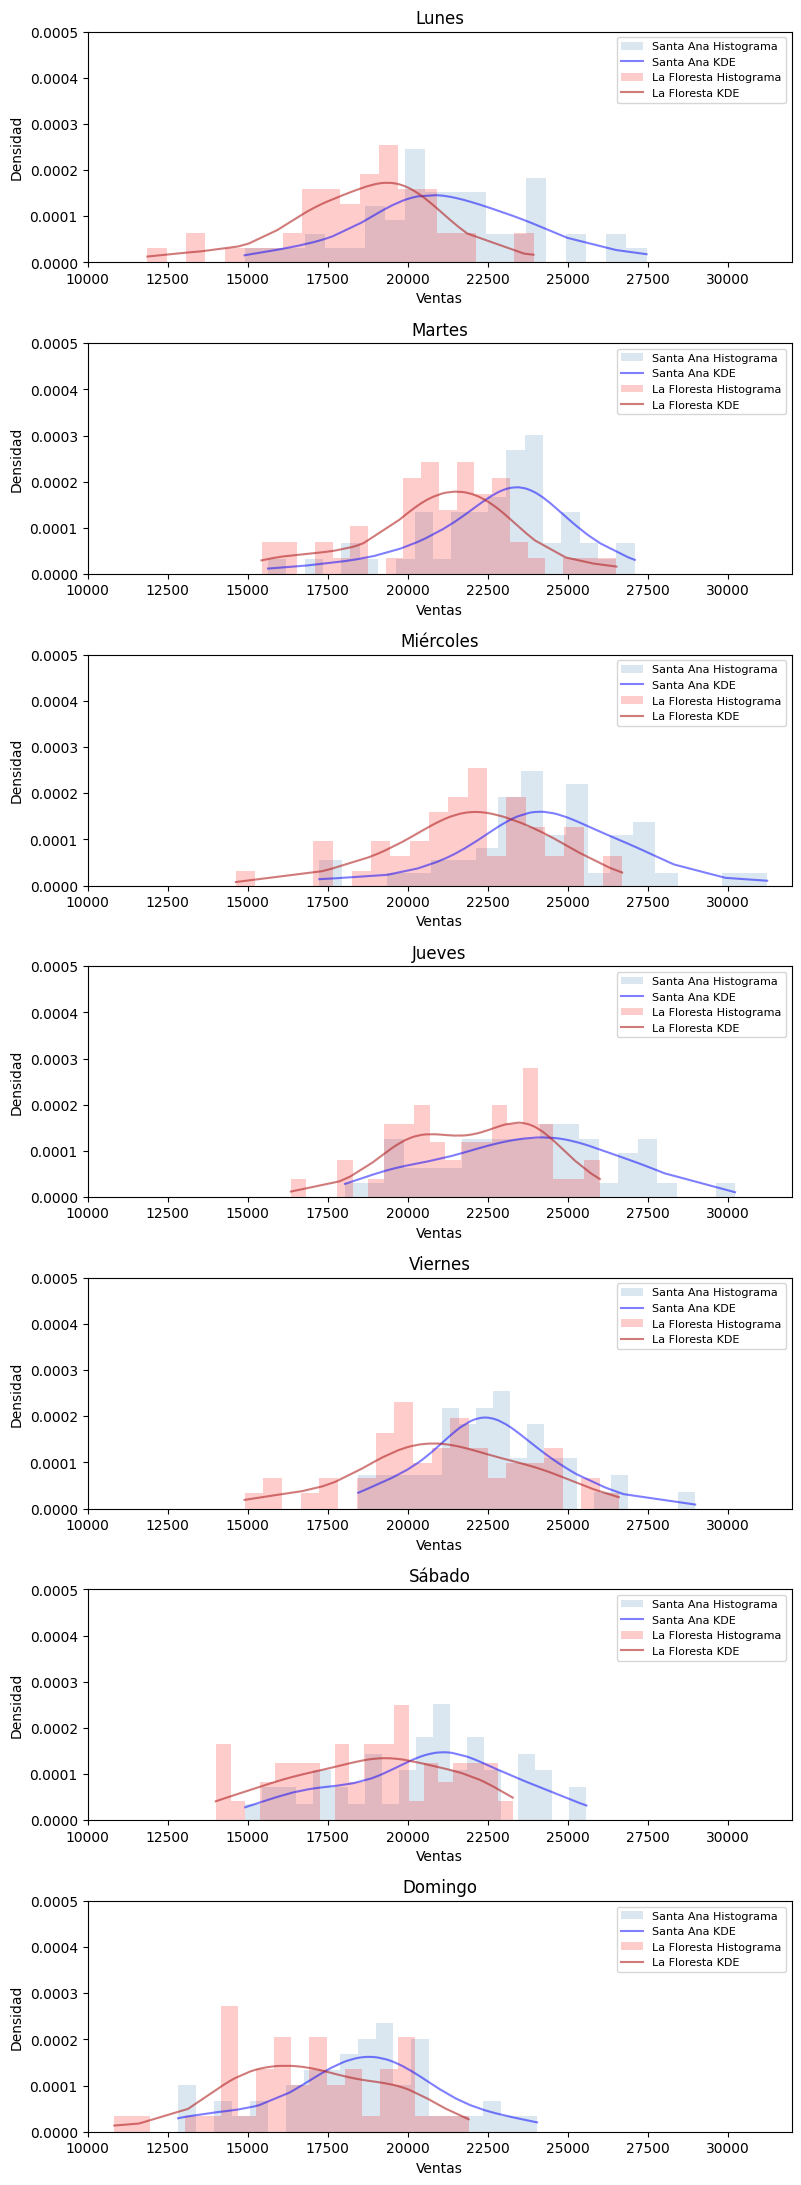

In [187]:
# ---------------- Aproximaciones a funciones de densidad : Histogramas | KDE ----------------

def plot_day_density(data1, tienda1, data2, tienda2):
    fig, axes = plt.subplots(7, 1, figsize=(8, 25), sharey=True)
    axes = axes.flatten() 

    for day in range(0, 7): 
        ax = axes[day]
        
        day_data1 = data1[data1['DiaSemana'] == day]['Ventas']
        day_data2 = data2[data2['DiaSemana'] == day]['Ventas']
        
        data_sorted1 = np.sort(day_data1)
        kde1 = gaussian_kde(day_data1)
        density1 = kde1(data_sorted1)
        ax.hist(day_data1, bins=20, density=True, alpha=0.2, label=f'{tienda1} Histograma', color="steelblue")
        ax.plot(data_sorted1, density1, label=f'{tienda1} KDE', color="blue", alpha = 0.5)

        data_sorted2 = np.sort(day_data2)
        kde2 = gaussian_kde(day_data2)
        density2 = kde2(data_sorted2)
        ax.hist(day_data2, bins=20, density=True, alpha=0.2, label=f'{tienda2} Histograma', color="red")
        ax.plot(data_sorted2, density2, label=f'{tienda2} KDE', color="firebrick", alpha = 0.6)

        ax.set_ylim([0, 0.0005]) 
        ax.set_xlim([10000,32000]) 
        ax.set_title(f'{dias_orden[day]}')
        ax.set_xlabel('Ventas')
        ax.set_ylabel('Densidad')
        ax.legend(loc='upper right', prop = { "size": 8 })  

    plt.tight_layout(pad=2.0)
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.07, right=0.95, hspace=0.35, wspace=0.25)
    plt.show()

# Graficar para Santa Ana y La Floresta
plot_day_density(santa_ana, 'Santa Ana', la_floresta, 'La Floresta')

In [188]:
# Función paca calcular intervalos de confianza empíricos

def confidence_intervals_day(data):
    results = {}
    for day in data['DiaSemana']:
        day_sales = data[data['DiaSemana'] == day]['Ventas']
        
        # Confidence intervals
        ci_95 = np.round(np.percentile(day_sales, [2.5, 97.5]),2)
        ci_99 = np.round(np.percentile(day_sales, [0.5, 99.5]),2)
        
        results[day] = {
            'ci_95': ci_95,
            'ci_99': ci_99
        }
    return results

In [189]:

# Intervalos de confianza para SANTA ANA

results_santa_ana = confidence_intervals_day(santa_ana)

# Diccionario para guardar los intervalos de cada tienda por mes
intervals_santa_ana_day = {'Dia': [], 'CI_95_Lower': [], 'CI_95_Upper': [], 'CI_99_Lower': [], 'CI_99_Upper': []}

for day in np.unique(santa_ana['DiaSemana']):

    ci_95_santa_ana = results_santa_ana[day]['ci_95']
    ci_99_santa_ana = results_santa_ana[day]['ci_99']
    
    intervals_santa_ana_day['Dia'].append(day)
    intervals_santa_ana_day['CI_95_Lower'].append(ci_95_santa_ana[0])
    intervals_santa_ana_day['CI_95_Upper'].append(ci_95_santa_ana[1])
    intervals_santa_ana_day['CI_99_Lower'].append(ci_99_santa_ana[0])
    intervals_santa_ana_day['CI_99_Upper'].append(ci_99_santa_ana[1])

# Dataframes | Ajustes
df_intervals_santa_ana_day = pd.DataFrame(intervals_santa_ana_day); 
df_intervals_santa_ana_day.columns = ['Dia','CI 95% Inferior','CI 95% Superior','CI 99% Inferior','CI 99% Superior']
df_intervals_santa_ana_day['Dia'] = dias_orden[0:8]

#print(df_intervals_santa_ana_day.to_markdown(tablefmt="grid"))
df_intervals_santa_ana

,Mes,CI 95% Inferior,CI 95% Superior,CI 99% Inferior,CI 99% Superior
0,Enero,12966.96,21094.47,12858.68,21936.69
1,Febrero,15658.48,24351.12,14383.86,24525.22
2,Marzo,18643.34,28726.12,18567.95,29693.17
3,Abril,14962.79,25352.21,14456.66,25442.60
4,Mayo,18127.39,28255.67,17361.76,30641.78
5,Junio,19461.68,27388.69,18409.28,27896.23
6,Julio,16798.73,26075.44,16439.19,27273.67
7,Agosto,17671.70,27669.70,16810.46,27741.43
8,Setiembre,18836.97,26682.64,18144.83,26887.15
9,Octubre,18257.00,29300.59,16692.47,30048.04


Dia       |   CI 95% Inferior |   CI 95% Superior |   CI 99% Inferior |   CI 99% Superior |
:---: | :---: | :---: | :---: | :---:
Lunes     |           16164.8 |           26593.2 |           15187.9 |           27253   |
Martes    |           17188   |           26651.7 |           15952   |           27047.7 |
Miércoles |           18200.5 |           29491.7 |           17376.1 |           30906   |
Jueves    |           19052.7 |           27950.6 |           18277   |           29670.9 |
Viernes   |           18923.7 |           26646.3 |           18523.4 |           28419.2 |
Sábado    |           15703.8 |           25061.3 |           15105.9 |           25531.5 |
Domingo   |           13042.5 |           23160.6 |           12878.5 |           23863.9 |

In [190]:
# Intervalos de confianza para LA FLORESTA

results_la_floresta = confidence_intervals_day(la_floresta)

# Diccionario para guardar los intervalos de cada tienda por mes
intervals_la_floresta_day = {'Dia': [], 'CI_95_Lower': [], 'CI_95_Upper': [], 'CI_99_Lower': [], 'CI_99_Upper': []}

for day in np.unique(la_floresta['DiaSemana']):

    ci_95_la_floresta = results_la_floresta[day]['ci_95']
    ci_99_la_floresta = results_la_floresta[day]['ci_99']
    
    intervals_la_floresta_day['Dia'].append(day)
    intervals_la_floresta_day['CI_95_Lower'].append(ci_95_la_floresta[0])
    intervals_la_floresta_day['CI_95_Upper'].append(ci_95_la_floresta[1])
    intervals_la_floresta_day['CI_99_Lower'].append(ci_99_la_floresta[0])
    intervals_la_floresta_day['CI_99_Upper'].append(ci_99_la_floresta[1])

# Dataframes | Ajustes
df_intervals_la_floresta_day = pd.DataFrame(intervals_la_floresta_day); 
df_intervals_la_floresta_day.columns = ['Dia','CI 95% Inferior','CI 95% Superior','CI 99% Inferior','CI 99% Superior']
df_intervals_la_floresta_day['Dia'] = dias_orden[0:8]

#print(df_intervals_la_floresta_day.to_markdown(tablefmt="grid"))
df_intervals_la_floresta_day

,Dia,CI 95% Inferior,CI 95% Superior,CI 99% Inferior,CI 99% Superior
0,Lunes,13296.56,23153.58,12210.67,23861.86
1,Martes,15847.20,25566.52,15523.95,26342.23
2,Miércoles,17386.12,26055.25,15324.80,26607.06
3,Jueves,17965.34,25598.45,16742.91,25938.25
4,Viernes,15896.16,25825.33,15158.57,26407.93
5,Sábado,14219.08,22589.28,14059.01,23126.69
6,Domingo,12068.24,21016.49,11036.77,21720.43


Dia       |   CI 95% Inferior |   CI 95% Superior |   CI 99% Inferior |   CI 99% Superior |
:---: | :---: | :---: | :---: | :---:
Lunes     |           13296.6 |           23153.6 |           12210.7 |           23861.9 |
Martes    |           15847.2 |           25566.5 |           15524   |           26342.2 |
Miércoles |           17386.1 |           26055.2 |           15324.8 |           26607.1 |
Jueves    |           17965.3 |           25598.5 |           16742.9 |           25938.2 |
Viernes   |           15896.2 |           25825.3 |           15158.6 |           26407.9 |
Sábado    |           14219.1 |           22589.3 |           14059   |           23126.7 |
Domingo   |           12068.2 |           21016.5 |           11036.8 |           21720.4 |


#### Parte 3 - Pruebas de hipótesis

Para realizar una prueba de hipótesis, de 95% y 99% respectivamente, y de esta forma confirmar (o rechazar) la intuición que se pueda tener acerca de que la tienda ’La Floresta’ vende menos que la tienda ’Santa Ana’, podríamos hacer uso de una *prueba t para muestras independientes*. Esta prueba por lo general se utiliza para comparar las medias de dos grupos de distribuciones, cuando las distribuciones son *aproximadamente normales*, por lo que sería un paso previo a chequear (de lo contrario deberíamos recurrir a pruebas no paramétricas). La hipótesis planteada quedaría de la siguiente manera: 

**Hipótesis Nula (H0)**  
La media de las ventas en "La Floresta" no es menor que la media de las ventas en "Santa Ana".

$H_0: \mu_{\text{La Floresta}} \geq \mu_{\text{Santa Ana}} $

**Hipótesis Alternativa (H1)**   
La media de las ventas en "La Floresta" es menor que la media de las ventas en "Santa Ana".

$ H_1: \mu_{\text{La Floresta}} < \mu_{\text{Santa Ana}} $
​


En este caso la prueba de hipótesis sería unilateral (*a una cola*), dado que planteamos si efectivamente una es menor a otra. Empezamos por probar la normalidad, para eso nos basaremos en la prueba de *Kolgomorov-Smirnov*, prueba no paramétrica que compara la muestras con una distribución de referencia (en este caso *la distribución normal*), para ver si sus distribuciones empíricas presentan diferencias significativas.

In [191]:
# Datos de ventas de ambos locales

ventas_santa_ana = santa_ana['Ventas']
ventas_la_floresta = la_floresta['Ventas']

normtest_santa_ana = stats.kstest(ventas_santa_ana, 'norm', args=(ventas_santa_ana.mean(), ventas_santa_ana.std(ddof=1)))
normtest_la_floresta = stats.kstest(ventas_la_floresta, 'norm', args=(ventas_la_floresta.mean(), ventas_la_floresta.std(ddof=1)))

print(f'p-valor test normalidad Santa Ana: {np.round(normtest_santa_ana.pvalue,4)}')
print(f'p-valor test normalidad La Floresta: {np.round(normtest_la_floresta.pvalue,4)}')

p-valor test normalidad Santa Ana: 0.4876
p-valor test normalidad La Floresta: 0.2775


Ambos p-valores dan significativos, por lo que no habría evidencia para rechazar las hipótesis nula de normalidad (la hipótesis nula en este test *establece* que los datos seguirían una distribución normal). Por lo tanto realizamos ahora la prueba t de muestras independientes para 95% y 99% (esto significa un nivel de significancia $\alpha = 0.05$ y $\alpha = 0.01$ respectivamente).

In [192]:
# Prueba t para muestras independientes
# alternative='less' para una cola, ya que probamos si La Floresta < Santa Ana
t_statistic, t_pvalue = stats.ttest_ind(ventas_la_floresta, ventas_santa_ana, alternative='less', equal_var=False)

# Resultados
print(f"Prueba t para muestras independientes\n"
      f"Estadístico t: {t_statistic}\n"
      f"Valor p: {t_pvalue}\n")

Prueba t para muestras independientes
Estadístico t: -8.209960764715603
Valor p: 5.040580154674935e-16



En este caso, observando el p-valor que devuelve la prueba de hipótesis (menor a ambos $\alpha$ para los distintos % de confianza), se puede concluir que tanto con un 95% de confianza, como con un 99% de confianza se rechaza la hipótesis nula, esto significa que las ventas en "La Floresta" son significativamente menores que en "Santa Ana". Esto también se puede evidenciar en la primera parte a través de las distribuciones empíricas para ambos locales a lo largo de los meses, donde se ven montos menores de venta de "La Floresta" (se encuentra *más a la izquierda*) con respecto a los montos de "Santa Ana".